In [1]:
# Import Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb


In [2]:
# Read in main CSV
digitalCurrency_df = pd.read_csv("data/Digital_Currency.csv")
digitalCurrency_df.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [3]:
# Explore data characteristics
digitalCurrency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


In [4]:
# Explore missing values
digitalCurrency_df.isnull().sum()

Unnamed: 0    0
open_SAR      0
open_USD      0
high_SAR      0
high_USD      0
low_SAR       0
low_USD       0
close_SAR     0
close_USD     0
volume        0
dtype: int64

In [5]:
# Explore descriptive statistics 
digitalCurrency_df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


In [6]:
# Rename the column with no name to 'Date'
digitalCurrency_df = digitalCurrency_df.rename(columns={digitalCurrency_df.columns[0]: 'Date'})
digitalCurrency_df.head()

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [7]:
# Convert 'Date' column from object to datetime format
digitalCurrency_df['Date'] = pd.to_datetime(digitalCurrency_df['Date'])
digitalCurrency_df.head()

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [8]:
# Sort the DataFrame by Date in ascending order
digitalCurrency_df = digitalCurrency_df.sort_values('Date')

# Calculate the increase/decrease for 'close_USD' compared to the previous day
digitalCurrency_df['close_USD_change'] = (digitalCurrency_df['close_USD'].diff() > 0).astype(int)

# Fill NaN in the first row with 0 
digitalCurrency_df['close_USD_change'].fillna(0, inplace=True)

# Calculate the increase/decrease for 'close_SAR' compared to the previous day
digitalCurrency_df['close_SAR_change'] = (digitalCurrency_df['close_SAR'].diff() > 0).astype(int)

# Fill NaN in the first row with 0 
digitalCurrency_df['close_SAR_change'].fillna(0, inplace=True)

# Display the DataFrame with new columns
digitalCurrency_df.head()

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume,close_USD_change,close_SAR_change
999,2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787,0,0
998,2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533,0,0
997,2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673,1,1
996,2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055,0,0
995,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227,0,0


## Merge all data frames into single data frame

In [9]:
# folder_path = "C:/Users/gseba/OneDrive/School_Stuff/ADS_506_Applied_Time_Series_Analysis/Group_Project/Working_Files_Git/Bitcoin_time_series_analysis_and_forecast/data"  
folder_path = "C:\MIDS\ADS-506-Applied_Time_Series_Analysis\Bitcoin_time_series_analysis_and_forecast\data" 

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create a dictionary to store DataFrames
dataframes = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for csv_file in csv_files:
    file_name = os.path.basename(csv_file)  # Extract the file name from the path
    short_name = os.path.splitext(file_name)[0]  # Remove the file extension
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    dataframes[short_name] = df

# Rename and create new DataFrames with shorter names
inflation_df = dataframes['5-Year Breakeven Inflation Rate - 2018-2021']
brent_oil_df = dataframes['Crude Oil Prices Brent - Europe - 2018-2021']

wti_oil_df = dataframes['Crude Oil WTI Futures Historical Data - 2018-2021']
# Function to convert mixed format to floats
def convert_vol(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1000  # Convert thousands to normal float
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000  # Convert millions to normal float
    else:
        return float(value)  # For values without K or M, return as is
    
# Convert the 'Vol.' column to strings, apply the conversion function, and then convert back to float
wti_oil_df['Vol.'] = wti_oil_df['Vol.'].astype(str).apply(convert_vol).astype(float) # Convert the 'Vol.' column to strings, apply the conversion function, and then convert back to float
wti_oil_df['Change %'] = wti_oil_df['Change %'].str.replace('%', '') # Remove '%' from the 'Change %' column
wti_oil_df['Change %'] = wti_oil_df['Change %'].astype(float)

federal_funds_df = dataframes['Daily Federal Funds Rate from 2018-2021']
treasury_rates_df = dataframes['daily-treasury-rates - 2018-2021']
crypto_df = digitalCurrency_df
djia_df = dataframes['Dow Jones Industrial Average-DJIA - 2018-2021']
uncertainty_df = dataframes['Economic Policy Uncertainty Index for United States - 2018-2021']

In [10]:
# Run .info() for each data frame
for name, df in dataframes.items():
    print(f"DataFrame Name: {name}\n")
    print(df.info())  
    print("\n-------------------------\n")  


DataFrame Name: 5-Year Breakeven Inflation Rate - 2018-2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    715 non-null    object 
 1   T5YIE   683 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.3+ KB
None

-------------------------

DataFrame Name: Crude Oil Prices Brent - Europe - 2018-2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          714 non-null    object 
 1   DCOILBRENTEU  697 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.3+ KB
None

-------------------------

DataFrame Name: Crude Oil WTI Futures Historical Data - 2018-2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 7 columns):
 #   Co

In [11]:
# Convert date columns to datetime format for each DataFrame
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'])
brent_oil_df['DATE'] = pd.to_datetime(brent_oil_df['DATE'])
wti_oil_df['Date'] = pd.to_datetime(wti_oil_df['Date'])
federal_funds_df['DATE'] = pd.to_datetime(federal_funds_df['DATE'])
treasury_rates_df['Date'] = pd.to_datetime(treasury_rates_df['Date'])
djia_df['DATE'] = pd.to_datetime(djia_df['DATE'])
uncertainty_df['DATE'] = pd.to_datetime(uncertainty_df['DATE'])

# Rename all date columns to "Date" in all DataFrames
inflation_df.rename(columns={'DATE': 'Date'}, inplace=True)
brent_oil_df.rename(columns={'DATE': 'Date'}, inplace=True)
wti_oil_df.rename(columns={'Date': 'Date'}, inplace=True)
federal_funds_df.rename(columns={'DATE': 'Date'}, inplace=True)
treasury_rates_df.rename(columns={'Date': 'Date'}, inplace=True)
djia_df.rename(columns={'DATE': 'Date'}, inplace=True)
uncertainty_df.rename(columns={'DATE': 'Date'}, inplace=True)

# Merge all DataFrames on the 'Date' column
merged_df = pd.merge(inflation_df, brent_oil_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, wti_oil_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, federal_funds_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, treasury_rates_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, crypto_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, djia_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, uncertainty_df, on='Date', how='outer')

In [12]:
# Replace non-finite values with a default value (e.g., 0)
merged_df['close_USD_change'].fillna(0, inplace=True)
merged_df['close_SAR_change'].fillna(0, inplace=True)

# Convert columns to integers
merged_df['close_USD_change'] = merged_df['close_USD_change'].astype(int)
merged_df['close_SAR_change'] = merged_df['close_SAR_change'].astype(int)

# Explore the merged data frame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1317
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1318 non-null   datetime64[ns]
 1   T5YIE                       683 non-null    float64       
 2   DCOILBRENTEU                697 non-null    float64       
 3   Price                       722 non-null    float64       
 4   Open                        722 non-null    float64       
 5   High                        722 non-null    float64       
 6   Low                         722 non-null    float64       
 7   Vol.                        690 non-null    float64       
 8   Change %                    722 non-null    float64       
 9   DFF                         1000 non-null   float64       
 10  4 WEEKS BANK DISCOUNT       1001 non-null   float64       
 11  4 WEEKS COUPON EQUIVALENT   1001 non-null   float64     

In [13]:
merged_df.head(10)

,Date,T5YIE,DCOILBRENTEU,Price,Open,High,Low,Vol.,Change %,DFF,...,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume,close_USD_change,close_SAR_change,DJIA,USEPUINDXD
0,2018-05-07,2.11,NaN,70.73,69.85,70.84,69.51,758920.0,1.45,1.7,...,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787.0,0,0,24357.32,96.74
1,2018-05-08,2.10,74.16,69.06,70.03,70.40,67.63,1250000.0,-2.36,1.7,...,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533.0,0,0,24360.21,100.02
2,2018-05-09,2.13,77.60,71.14,70.05,71.36,69.85,863390.0,3.01,1.7,...,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673.0,1,1,24542.54,62.20
3,2018-05-10,2.12,77.59,71.36,71.23,71.89,70.56,749810.0,0.31,1.7,...,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055.0,0,0,24739.53,74.02
4,2018-05-11,2.13,77.37,70.70,71.45,71.63,70.45,634150.0,-0.92,1.7,...,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227.0,0,0,24831.17,78.27
5,2018-05-14,2.12,78.17,70.96,70.54,71.26,70.26,592830.0,0.37,1.7,...,8879.99,31042.060800,8277.00,32490.990336,8663.34,37389.0,0,0,24899.41,127.21
6,2018-05-15,2.15,78.94,71.31,71.15,71.92,70.42,815290.0,0.49,1.7,...,8859.99,31508.235520,8401.30,31735.884800,8462.00,28126.0,0,0,24706.41,42.73
7,2018-05-16,2.16,78.19,71.49,71.02,71.59,70.66,574280.0,0.25,1.7,...,8488.00,30314.520704,8083.01,31240.832000,8330.00,31130.0,0,0,24768.93,50.06
8,2018-05-17,2.16,80.09,71.49,71.56,72.30,71.09,562640.0,0.00,1.7,...,8464.00,29924.441600,7979.00,30158.691584,8041.46,25439.0,0,0,24713.98,74.49
9,2018-05-18,2.14,78.38,71.28,71.60,71.75,70.99,211790.0,-0.29,1.7,...,8273.21,29672.789760,7911.90,30902.583424,8239.81,23476.0,1,1,24715.09,129.32


## Align the data frame by date to ensure all data is within the same range

In [14]:
# Store all DataFrames in a dictionary
all_dfs = {
    'Inflation': inflation_df,
    'Brent Oil': brent_oil_df,
    'WTI Oil': wti_oil_df,
    'Federal Funds': federal_funds_df,
    'Treasury Rates': treasury_rates_df,
    'Crypto': crypto_df,
    'DJIA': djia_df,
    'Uncertainty': uncertainty_df,
    'Digital Currency': digitalCurrency_df  # Include Digital Currency DataFrame
}

# Find first and last dates in each DataFrame
for df_name, df in all_dfs.items():
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    print(f"For {df_name} DataFrame:")
    print(f"First date: {min_date}")
    print(f"Last date: {max_date}")
    print()


For Inflation DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-29 00:00:00

For Brent Oil DataFrame:
First date: 2018-05-08 00:00:00
Last date: 2021-01-29 00:00:00

For WTI Oil DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-29 00:00:00

For Federal Funds DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00

For Treasury Rates DataFrame:
First date: 2018-01-02 00:00:00
Last date: 2021-12-31 00:00:00

For Crypto DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00

For DJIA DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-29 00:00:00

For Uncertainty DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00

For Digital Currency DataFrame:
First date: 2018-05-07 00:00:00
Last date: 2021-01-30 00:00:00



### Remove rows with dates outside specified range

In [15]:
# Set the date range
start_date = '2018-05-08'
end_date = '2021-01-29'

# Convert dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the DataFrame based on the date range
merged_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Check the information of the filtered DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        998 non-null    datetime64[ns]
 1   T5YIE                       682 non-null    float64       
 2   DCOILBRENTEU                697 non-null    float64       
 3   Price                       721 non-null    float64       
 4   Open                        721 non-null    float64       
 5   High                        721 non-null    float64       
 6   Low                         721 non-null    float64       
 7   Vol.                        689 non-null    float64       
 8   Change %                    721 non-null    float64       
 9   DFF                         998 non-null    float64       
 10  4 WEEKS BANK DISCOUNT       682 non-null    float64       
 11  4 WEEKS COUPON EQUIVALENT   682 non-null    float64       

## Replace all cells with '.' with an empty cell

In [16]:
# Replace cells with a dot (.) with an empty cell
merged_df = merged_df.replace('.', '')

# Replace empty strings with NaN
merged_df = merged_df.replace('', pd.NA)

## Impute missing data with data from "weekend" due to market closures

In [17]:
# List to store the unique days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to count unique days of the week in a DataFrame
def count_unique_days(df):
    # Extract day of the week from the 'Date' column
    df['Day_of_Week'] = df['Date'].dt.day_name()
    
    # Count occurrences of each day
    unique_days_count = df['Day_of_Week'].value_counts().reindex(days_of_week, fill_value=0)
    
    return unique_days_count

# Store all DataFrames in a dictionary
all_dfs = {
    'Inflation': inflation_df,
    'Brent Oil': brent_oil_df,
    'WTI Oil': wti_oil_df,
    'Federal Funds': federal_funds_df,
    'Treasury Rates': treasury_rates_df,
    'Crypto': crypto_df,
    'DJIA': djia_df,
    'Uncertainty': uncertainty_df,
    'Digital Currency': digitalCurrency_df  # Include Digital Currency DataFrame
}

# Count unique days of the week in each DataFrame
for df_name, df in all_dfs.items():
    unique_days = count_unique_days(df)
    print(f"Unique days of the week in {df_name} DataFrame:")
    print(unique_days)
    print()


Unique days of the week in Inflation DataFrame:
Monday       143
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday       0
Sunday         0
Name: Day_of_Week, dtype: int64

Unique days of the week in Brent Oil DataFrame:
Monday       142
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday       0
Sunday         0
Name: Day_of_Week, dtype: int64

Unique days of the week in WTI Oil DataFrame:
Monday       143
Tuesday      143
Wednesday    143
Thursday     143
Friday       139
Saturday       0
Sunday        11
Name: Day_of_Week, dtype: int64

Unique days of the week in Federal Funds DataFrame:
Monday       143
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday     143
Sunday       142
Name: Day_of_Week, dtype: int64

Unique days of the week in Treasury Rates DataFrame:
Monday       185
Tuesday      207
Wednesday    204
Thursday     203
Friday       202
Saturday       0
Sunday         0
Name: Day_of_Week, dtype: 

In [18]:
# List to store the unique days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to count unique days of the week in a DataFrame
def count_unique_days(df):
    # Extract day of the week from the 'Date' column
    df['Day_of_Week'] = df['Date'].dt.day_name()
    
    # Count occurrences of each day
    unique_days_count = df['Day_of_Week'].value_counts().reindex(days_of_week, fill_value=0)
    
    return unique_days_count

# Count unique days of the week in merged_df DataFrame
unique_days_merged = count_unique_days(merged_df)
print("Unique days of the week in merged_df DataFrame:")
print(unique_days_merged)


Unique days of the week in merged_df DataFrame:
Monday       142
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday     142
Sunday       142
Name: Day_of_Week, dtype: int64


In [19]:
merged_df.isna().sum()

Date                            0
T5YIE                         316
DCOILBRENTEU                  301
Price                         277
Open                          277
High                          277
Low                           277
Vol.                          309
Change %                      277
DFF                             0
4 WEEKS BANK DISCOUNT         316
4 WEEKS COUPON EQUIVALENT     316
8 WEEKS BANK DISCOUNT         427
8 WEEKS COUPON EQUIVALENT     427
13 WEEKS BANK DISCOUNT        316
13 WEEKS COUPON EQUIVALENT    316
26 WEEKS BANK DISCOUNT        316
26 WEEKS COUPON EQUIVALENT    316
52 WEEKS BANK DISCOUNT        316
52 WEEKS COUPON EQUIVALENT    316
open_SAR                        0
open_USD                        0
high_SAR                        0
high_USD                        0
low_SAR                         0
low_USD                         0
close_SAR                       0
close_USD                       0
volume                          0
close_USD_chan

In [20]:
# Fill empty cells with data from the previous cell
merged_df = merged_df.fillna(method='ffill')

In [21]:
# List to store the unique days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to count unique days of the week in a DataFrame
def count_unique_days(df):
    # Extract day of the week from the 'Date' column
    df['Day_of_Week'] = df['Date'].dt.day_name()
    
    # Count occurrences of each day
    unique_days_count = df['Day_of_Week'].value_counts().reindex(days_of_week, fill_value=0)
    
    return unique_days_count

# Count unique days of the week in merged_df DataFrame
unique_days_merged = count_unique_days(merged_df)
print("Unique days of the week in merged_df DataFrame:")
print(unique_days_merged)


# Create a label encoder
label_encoder = LabelEncoder()
# Fit and transform the 'Day_of_Week' column
merged_df['Day_of_Week_encoded'] = label_encoder.fit_transform(merged_df['Day_of_Week'])

Unique days of the week in merged_df DataFrame:
Monday       142
Tuesday      143
Wednesday    143
Thursday     143
Friday       143
Saturday     142
Sunday       142
Name: Day_of_Week, dtype: int64


In [22]:
merged_df.isna().sum()

Date                            0
T5YIE                           0
DCOILBRENTEU                    0
Price                           0
Open                            0
High                            0
Low                             0
Vol.                            0
Change %                        0
DFF                             0
4 WEEKS BANK DISCOUNT           0
4 WEEKS COUPON EQUIVALENT       0
8 WEEKS BANK DISCOUNT         115
8 WEEKS COUPON EQUIVALENT     115
13 WEEKS BANK DISCOUNT          0
13 WEEKS COUPON EQUIVALENT      0
26 WEEKS BANK DISCOUNT          0
26 WEEKS COUPON EQUIVALENT      0
52 WEEKS BANK DISCOUNT          0
52 WEEKS COUPON EQUIVALENT      0
open_SAR                        0
open_USD                        0
high_SAR                        0
high_USD                        0
low_SAR                         0
low_USD                         0
close_SAR                       0
close_USD                       0
volume                          0
close_USD_chan

In [23]:
# Define a dictionary to map old column names to new column names
column_name_mapping = {
    'T5YIE': '5-Year Inflation Expectation',
    'DCOILBRENTEU': 'Brent Crude Price',
    'Price': 'WTI Crude Price',
    'Open': 'WTI Crude Open',
    'High': 'WTI Crude High',
    'Low': 'WTI Crude Low',
    'Vol.': 'WTI Crude Volume',
    'Change %': 'WTI Crude Price Change %',
    'DFF': 'Fed Funds Rate',
    '26 WEEKS BANK DISCOUNT': '26 Week Treas. Rate',
    '26 WEEKS COUPON EQUIVALENT': '26 Week Treas. Yield',
    '52 WEEKS BANK DISCOUNT': '52 Week Treas. Rate',
    '52 WEEKS COUPON EQUIVALENT': '52 Week Treas. Yield',
    'open_SAR': 'open SAR',
    'open_USD': 'open USD',
    'high_SAR': 'high SAR',
    'high_USD': 'high USD',
    'low_SAR': 'low SAR',
    'low_USD': 'low USD',
    'close_SAR': 'close SAR',
    'close_USD': 'close USD',
    'volume': 'Digital Currency Volume',
    'DJIA': 'DJIA',
    'USEPUINDXD': 'Uncertainty Index',
}

# Rename the columns in merged_df using the dictionary
merged_df.rename(columns=column_name_mapping, inplace=True)

# Drop unwanted columns
merged_df = merged_df.drop(columns=['Day_of_Week'])

C:\Users\trevor.sauerbrey\AppData\Local\Temp\ipykernel_30864\3733339523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


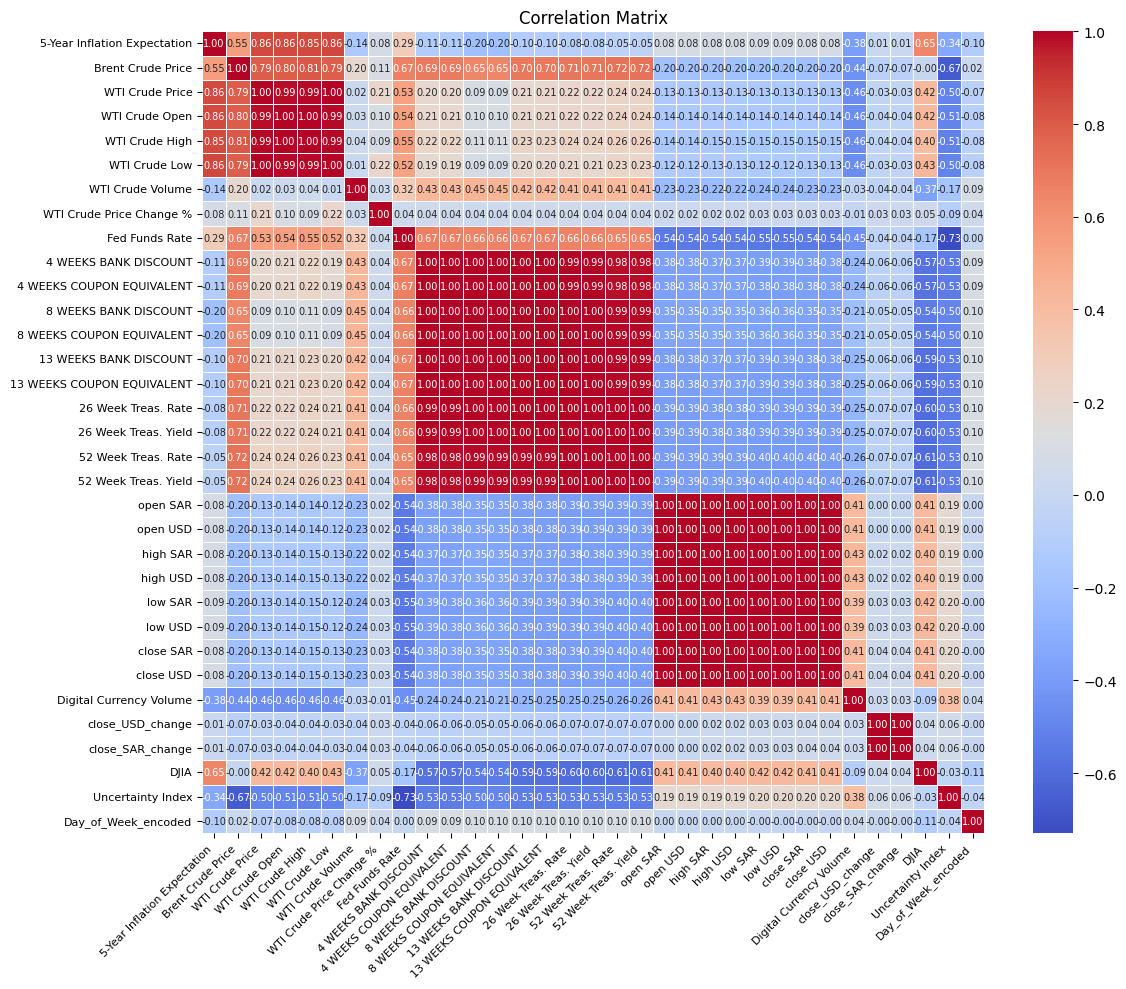

In [24]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a larger heatmap with adjusted aspect ratio and cell size
plt.figure(figsize=(12, 10))  # Adjust the figure size and aspect ratio
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
                      annot_kws={"size": 7})  # Increase annotation font size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate the labels by 45 degrees and adjust font size
plt.yticks(rotation=0, fontsize=8)  # Rotate y-axis labels to horizontal for better readability and adjust font size

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [25]:
# Extract correlations for 'close SAR' and 'close USD' against other variables
correlation_with_close_sar = correlation_matrix['close SAR'].drop(['close SAR', 'close USD', 'Date']).sort_values(ascending=False)
correlation_with_close_usd = correlation_matrix['close USD'].drop(['close SAR', 'close USD', 'Date']).sort_values(ascending=False)

# Display descending list of correlations for 'close SAR' and 'close USD'
print("Correlation with 'close SAR':")
print(correlation_with_close_sar)

print("\nCorrelation with 'close USD':")
print(correlation_with_close_usd)


KeyError: "['Date'] not found in axis"

## Compute Performance Metrics of Baseline Naive Model

In [ ]:
# Split the data into training and testing sets
X = merged_df.drop(columns=['close SAR', 'close USD'])
y_sar = merged_df['close SAR']
y_usd = merged_df['close USD']
X_train, X_test, y_sar_train, y_sar_test, y_usd_train, y_usd_test = train_test_split(
    X, y_sar, y_usd, test_size=0.2, random_state=42)

# Calculate the mean of the target variables in the training set
mean_sar = y_sar_train.mean()
mean_usd = y_usd_train.mean()

# Create predictions by using the mean as a constant value
sar_baseline_predictions = [mean_sar] * len(y_sar_test)
usd_baseline_predictions = [mean_usd] * len(y_usd_test)

# Calculate various performance metrics
sar_mae = mean_absolute_error(y_sar_test, sar_baseline_predictions)
sar_rmse = mean_squared_error(y_sar_test, sar_baseline_predictions, squared=False)
sar_r2 = r2_score(y_sar_test, sar_baseline_predictions)

usd_mae = mean_absolute_error(y_usd_test, usd_baseline_predictions)
usd_rmse = mean_squared_error(y_usd_test, usd_baseline_predictions, squared=False)
usd_r2 = r2_score(y_usd_test, usd_baseline_predictions)

# Print the performance metrics
print("Performance Metrics for close_SAR:")
print(f"Mean Absolute Error (MAE): {sar_mae}")
print(f"Root Mean Squared Error (RMSE): {sar_rmse}")
print(f"R-squared (R2): {sar_r2}")

print("\nPerformance Metrics for close_USD:")
print(f"Mean Absolute Error (MAE): {usd_mae}")
print(f"Root Mean Squared Error (RMSE): {usd_rmse}")
print(f"R-squared (R2): {usd_r2}")

In [ ]:
# Drop unwanted columns
merged_df = merged_df.drop(columns=['8 WEEKS BANK DISCOUNT'])
merged_df = merged_df.drop(columns=['8 WEEKS COUPON EQUIVALENT'])


data_types = merged_df.dtypes
data_types

In [ ]:
merged_df.info()

## Create visualizations for analysis

### Line charts

In [ ]:
# Set the style of the plots
sns.set(style="whitegrid")

# Select only the numerical columns non-binary
excluded_columns = ['close_USD_change', 'close_SAR_change', 'Day_of_Week_encoded']
numerical_columns = [col for col in merged_df.columns if merged_df[col].dtype in ['float64', 'int64'] and col != 'Date']

# Exclude columns listed in excluded_columns
numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

# Plotting line charts for each numerical column by 'Date'
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(x='Date', y=column, data=merged_df)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Line chart of {column} by Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### ACF and PACF

In [ ]:
# Select only the numerical columns non-binary
excluded_columns = ['close_USD_change', 'close_SAR_change', 'Day_of_Week_encoded']
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Exclude columns listed in excluded_columns
numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

# Plot ACF for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plot_acf(merged_df[column].dropna(), lags=50)
    plt.title(f'ACF for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

In [ ]:
# Select only the numerical columns non-binary
excluded_columns = ['close_USD_change', 'close_SAR_change', 'Day_of_Week_encoded']
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Exclude columns listed in excluded_columns
numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

# Plot PACF for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plot_pacf(merged_df[column].dropna(), lags=50)
    plt.title(f'PACF for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

### ACF and PACF with Differencing

In [ ]:
# Select only the numerical columns non-binary
excluded_columns = ['close_USD_change', 'close_SAR_change', 'Day_of_Week_encoded']
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Exclude columns listed in excluded_columns
numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

# Apply differencing to each numerical column and plot ACF after differencing
for column in numerical_columns:
    differenced_data = merged_df[column].diff().dropna()
    
    plt.figure(figsize=(8, 4))
    plot_acf(differenced_data, lags=50)
    plt.title(f'ACF after differencing for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

In [ ]:
# Select only the numerical columns non-binary
excluded_columns = ['close_USD_change', 'close_SAR_change', 'Day_of_Week_encoded']
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Exclude columns listed in excluded_columns
numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

# Apply differencing to each numerical column and plot PACF after differencing
for column in numerical_columns:
    differenced_data = merged_df[column].diff().dropna()
    
    plt.figure(figsize=(8, 4))
    plot_pacf(differenced_data, lags=50)
    plt.title(f'PACF after differencing for {column}')
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

### Regression plots for close_SAR

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Set the style of the plots
sns.set(style="whitegrid")

# Plotting scatter plots of 'Price' against all other numerical columns with a regression line
for column in numerical_columns:
    if column != 'close SAR':
        plt.figure(figsize=(8, 5))
        sns.lmplot(x=column, y='close SAR', data=merged_df, height=6, scatter_kws={'color': '#3e82fc'}, line_kws={'color': 'red'})
        plt.xlabel(column)
        plt.ylabel('close SAR')
        plt.title(f'Scatter plot of Price against {column} with Regression Line')
        plt.tight_layout()
        plt.show()

# Reset warnings to default
warnings.resetwarnings()


### Regression plots for close_USD  

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Set the style of the plots
sns.set(style="whitegrid")

# Plotting scatter plots of 'Price' against all other numerical columns with a regression line
for column in numerical_columns:
    if column != 'close USD':
        plt.figure(figsize=(8, 5))
        sns.lmplot(x=column, y='close USD', data=merged_df, height=6, scatter_kws={'color': '#3e82fc'}, line_kws={'color': 'red'})
        plt.xlabel(column)
        plt.ylabel('close USD')
        plt.title(f'Scatter plot of Price against {column} with Regression Line')
        plt.tight_layout()
        plt.show()

# Reset warnings to default
warnings.resetwarnings()


## Preliminary Model Exploration

In [ ]:
# Split the data into training and testing sets
X = merged_df.drop(columns=['Date', 'close SAR', 'close USD', 'close_USD_change', 'close_SAR_change', 'Day_of_Week_encoded'])
y_sar = merged_df['close SAR']
y_usd = merged_df['close USD']


# Scale the features and create a DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the scaled data into training and testing sets
X_train, X_test, y_sar_train, y_sar_test, y_usd_train, y_usd_test = train_test_split(
    X_scaled_df, y_sar, y_usd, test_size=0.2, random_state=42)


# Define a function to train and evaluate a model for a target variable
def train_and_evaluate_model(X_train, X_test, y_train, y_test, target_variable, model_name):
    if model_name == 'RandomForest':
        model = RandomForestRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    elif model_name == 'GradientBoosting':
        model = GradientBoostingRegressor()
    else:
        raise ValueError(f"Invalid model name: {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions using the model
    predictions = model.predict(X_test)

    # Calculate the model's performance metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    print(f"\n{model_name} Model Metrics for {target_variable}:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Store the metrics in the respective dictionaries
    if target_variable == 'close SAR':
        sar_metrics[model_name] = {
            'Model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        }
    elif target_variable == 'close USD':
        usd_metrics[model_name] = {
            'Model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        }

    print(f"\n{model_name} Model Metrics for {target_variable}:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Get feature importances if the model supports it
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        return model, feature_importances

    return model, {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'FeatureImportances': feature_importances
    }

# Create dictionaries to store metrics
sar_metrics = {}
usd_metrics = {}

# Create dictionaries to store models and feature importances
sar_models = {}
sar_feature_importances = {}
usd_models = {}
usd_feature_importances = {}

# Train and evaluate models for 'close_SAR' using different regressors
model_names = ['RandomForest', 'XGBoost', 'GradientBoosting']

for model_name in model_names:
    sar_models[model_name], sar_feature_importances[model_name] = train_and_evaluate_model(
        X_train, X_test, y_sar_train, y_sar_test, 'close SAR', model_name)

# Create an ensemble model using VotingRegressor for 'close SAR'
ensemble_model_sar = VotingRegressor(estimators=[
    ('RandomForest', sar_models['RandomForest']),
    ('XGBoost', sar_models['XGBoost']),
    ('GradientBoosting', sar_models['GradientBoosting'])
])

# Train and evaluate the ensemble model for 'close SAR'
ensemble_model_sar.fit(X_train, y_sar_train)
ensemble_predictions_sar = ensemble_model_sar.predict(X_test)
ensemble_mae_sar = mean_absolute_error(y_sar_test, ensemble_predictions_sar)
ensemble_rmse_sar = mean_squared_error(y_sar_test, ensemble_predictions_sar, squared=False)
ensemble_r2_sar = r2_score(y_sar_test, ensemble_predictions_sar)

print("\nEnsemble Model Metrics for close_SAR:")
print(f"Mean Absolute Error (MAE): {ensemble_mae_sar:.4f}")
print(f"Root Mean Squared Error (RMSE): {ensemble_rmse_sar:.4f}")
print(f"R-squared (R2): {ensemble_r2_sar:.4f}")

# Train and evaluate models for 'close USD' using different regressors
for model_name in model_names:
    usd_models[model_name], usd_feature_importances[model_name] = train_and_evaluate_model(
        X_train, X_test, y_usd_train, y_usd_test, 'close USD', model_name)

# Create an ensemble model using VotingRegressor for 'close USD'
ensemble_model_usd = VotingRegressor(estimators=[
    ('RandomForest', usd_models['RandomForest']),
    ('XGBoost', usd_models['XGBoost']),
    ('GradientBoosting', usd_models['GradientBoosting'])
])

# Train and evaluate the ensemble model for 'close USD'
ensemble_model_usd.fit(X_train, y_usd_train)
ensemble_predictions_usd = ensemble_model_usd.predict(X_test)
ensemble_mae_usd = mean_absolute_error(y_usd_test, ensemble_predictions_usd)
ensemble_rmse_usd = mean_squared_error(y_usd_test, ensemble_predictions_usd, squared=False)
ensemble_r2_usd = r2_score(y_usd_test, ensemble_predictions_usd)

print("\nEnsemble Model Metrics for close USD:")
print(f"Mean Absolute Error (MAE): {ensemble_mae_usd:.4f}")
print(f"Root Mean Squared Error (RMSE): {ensemble_rmse_usd:.4f}")
print(f"R-squared (R2): {ensemble_r2_usd:.4f}")

# Create two subplots for feature importances (close_SAR in green, close_USD in blue)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot the feature importances for close_SAR in green
axes[0].barh(X_train.columns, sar_feature_importances['RandomForest'], color='green', label='RandomForest')
axes[0].barh(X_train.columns, sar_feature_importances['XGBoost'], color='lightgreen', label='XGBoost', alpha=0.7)
axes[0].barh(X_train.columns, sar_feature_importances['GradientBoosting'], color='limegreen', label='GradientBoosting', alpha=0.5)
axes[0].set_title('Feature Importances for close SAR Models')
axes[0].set_xlabel('Feature Importance')
axes[0].legend()

# Plot the feature importances for close_USD in blue
axes[1].barh(X_train.columns, usd_feature_importances['RandomForest'], color='blue', label='RandomForest')
axes[1].barh(X_train.columns, usd_feature_importances['XGBoost'], color='lightblue', label='XGBoost', alpha=0.7)
axes[1].barh(X_train.columns, usd_feature_importances['GradientBoosting'], color='royalblue', label='GradientBoosting', alpha=0.5)
axes[1].set_title('Feature Importances for close_USD Models')
axes[1].set_xlabel('Feature Importance')
axes[1].legend()

plt.tight_layout()
plt.show()


## Feature Selection - Model Evaluation

In [ ]:
# Create two subplots for feature importances (close_SAR in green, close_USD in blue)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot individual feature importances for close_SAR models (in green)
for i, model_name in enumerate(model_names):
    axes[0, i].barh(X_train.columns, sar_feature_importances[model_name], color='green')
    axes[0, i].set_title(f'Feature Importances for {model_name} (close_SAR)')
    axes[0, i].set_xlabel('Feature Importance')

# Plot individual feature importances for close_USD models (in blue)
for i, model_name in enumerate(model_names):
    axes[1, i].barh(X_train.columns, usd_feature_importances[model_name], color='blue')
    axes[1, i].set_title(f'Feature Importances for {model_name} (close_USD)')
    axes[1, i].set_xlabel('Feature Importance')

plt.tight_layout()
plt.show()

In [ ]:
# Define the color scheme for the bars
sar_bar_colors = ['green', 'lightgreen', 'limegreen']
usd_bar_colors = ['blue', 'lightblue', 'royalblue']

# Create subplots for performance metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot performance metrics for close_SAR
sar_x = np.arange(len(sar_metrics['Model']))
width = 0.2

bar1 = axes[0].bar(sar_x - width, sar_metrics['MAE'], width, label='MAE', color=sar_bar_colors[0], alpha=0.7)
bar2 = axes[0].bar(sar_x, sar_metrics['RMSE'], width, label='RMSE', color=sar_bar_colors[1], alpha=0.7)

axes[0].set_title('Performance Metrics for close_SAR Models')
axes[0].set_xlabel('Model')
axes[0].set_xticks(sar_x)
axes[0].set_xticklabels(sar_metrics['Model'])

# Create a twin y-axis for R2
axes2 = axes[0].twinx()
bar3 = axes2.bar(sar_x + width, sar_metrics['R2'], width, label='R2', color=sar_bar_colors[2], alpha=0.7)
axes2.set_ylabel('R2')
axes2.set_ylim(0, 1.2)  # Set the y-axis range for R2

# Add numbers on top of the bars for MAE and RMSE
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

# Add R2 values on top of the R2 bars
for bar in bar3:
    height = bar.get_height()
    axes2.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

# Legend for all bars
lines, labels = axes[0].get_legend_handles_labels()
lines2, labels2 = axes2.get_legend_handles_labels()
axes[0].legend(lines + lines2, labels + labels2, loc='upper left')

# Plot performance metrics for close_USD
usd_x = np.arange(len(usd_metrics['Model']))

bar4 = axes[1].bar(usd_x - width, usd_metrics['MAE'], width, label='MAE', color=usd_bar_colors[0], alpha=0.7)
bar5 = axes[1].bar(usd_x, usd_metrics['RMSE'], width, label='RMSE', color=usd_bar_colors[1], alpha=0.7)

axes[1].set_title('Performance Metrics for close_USD Models')
axes[1].set_xlabel('Model')
axes[1].set_xticks(usd_x)
axes[1].set_xticklabels(usd_metrics['Model'])

# Create a twin y-axis for R2
axes3 = axes[1].twinx()
bar6 = axes3.bar(usd_x + width, usd_metrics['R2'], width, label='R2', color=usd_bar_colors[2], alpha=0.7)
axes3.set_ylabel('R2')
axes3.set_ylim(0, 1.2)  # Set the y-axis range for R2

# Add numbers on top of the bars for MAE and RMSE
for bars in [bar4, bar5]:
    for bar in bars:
        height = bar.get_height()
        axes[1].annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

# Add R2 values on top of the R2 bars
for bar in bar6:
    height = bar.get_height()
    axes3.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

# Legend for all bars
lines3, labels3 = axes[1].get_legend_handles_labels()
lines4, labels4 = axes3.get_legend_handles_labels()
axes[1].legend(lines3 + lines4, labels3 + labels4, loc='right')

plt.tight_layout()
plt.show()

## Logistic Regression Model

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Create a new DataFrame for logistic regression without modifying merged_df
logistic_df = merged_df.copy()

# Columns to exclude from lagged features and target prediction
exclude_columns = ['Date', 'close_USD_change', 'close_SAR_change']

# Create lagged features for each predictor column
for col in logistic_df.columns:
    if col not in exclude_columns:
        for i in range(1, 4):  # Creating lag features for 3 time periods
            new_col_name = f"{col}_lag{i}"
            logistic_df[new_col_name] = logistic_df[col].shift(i)

# Drop rows with NaN resulting from the lag operation
logistic_df.dropna(inplace=True)

# Define predictor variables and target variable
target = 'close_USD_change' 

# Define all columns except the ones in exclude_columns as predictors
predictors = [col for col in logistic_df.columns if col not in exclude_columns]

# Set up X (predictors) and y (target) variables
X = logistic_df[predictors]
y = logistic_df[target]

# Scale the predictor variables using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
split_index = int(len(logistic_df) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define and fit the logistic regression model
logreg = LogisticRegression(max_iter=10000)  
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Evaluation metrics for close_USD_change:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Reset warnings to default
warnings.resetwarnings()

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Create a new DataFrame for logistic regression without modifying merged_df
logistic_df = merged_df.copy()

# Columns to exclude from lagged features and target prediction
exclude_columns = ['Date', 'close_USD_change', 'close_SAR_change']

# Create lagged features for each predictor column
for col in logistic_df.columns:
    if col not in exclude_columns:
        for i in range(1, 4):  
            new_col_name = f"{col}_lag{i}"
            logistic_df[new_col_name] = logistic_df[col].shift(i)

# Drop rows with NaN resulting from the lag operation
logistic_df.dropna(inplace=True)

# Define predictor variables and target variable
target = 'close_SAR_change'  

# Define all columns except the ones in exclude_columns as predictors
predictors = [col for col in logistic_df.columns if col not in exclude_columns]

# Set up X (predictors) and y (target) variables
X = logistic_df[predictors]
y = logistic_df[target]

# Scale the predictor variables using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
split_index = int(len(logistic_df) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define and fit the logistic regression model
logreg = LogisticRegression(max_iter=10000)  
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Evaluation metrics for close_SAR_change:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Reset warnings to default
warnings.resetwarnings()

In [ ]:
merged_df.info()

## Feature Selection - PCA

### Scale the data

In [ ]:
# Select columns to be scaled 
columns_to_scale = merged_df.columns.difference(['Date'])

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
merged_df[columns_to_scale] = scaler.fit_transform(merged_df[columns_to_scale])

merged_df.info()

In [ ]:
# Create new df excluding target variables close_TSLA and positive_TSLA
PCA_df =  merged_df[['5-Year Inflation Expectation', 'Brent Crude Price', 'WTI Crude Price',
       'WTI Crude Open', 'WTI Crude High', 'WTI Crude Low', 'WTI Crude Volume',
       'WTI Crude Price Change %', 'Fed Funds Rate', '4 WEEKS BANK DISCOUNT',
       '4 WEEKS COUPON EQUIVALENT', '13 WEEKS BANK DISCOUNT',
       '13 WEEKS COUPON EQUIVALENT', '26 Week Treas. Rate',
       '26 Week Treas. Yield', '52 Week Treas. Rate', '52 Week Treas. Yield',
       'open SAR', 'open USD', 'high SAR', 'high USD', 'low SAR', 'low USD',
       'close SAR', 'close USD', 'Digital Currency Volume', 'DJIA',
       'Uncertainty Index', 'Day_of_Week_encoded']]

# Initialize PCA with a large number of components
pca_digcur = PCA(n_components=len(PCA_df.columns))

# Fit PCA to the PCA_df data
pca_digcur.fit(PCA_df)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca_digcur.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), \
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Create a PCA object with n components
pca_digcur = PCA(n_components=10)

# Fit the PCA model to the PCA data and transform it to the principal components
principalComponents_digcur = pca_digcur.fit_transform(PCA_df)

In [ ]:
# Create a DataFrame 'principal_tsla_Df' with n principal components columns
principal_digcur_Df = pd.DataFrame(data = principalComponents_digcur
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3', 'principal component 4',
                          'principal component 5', 'principal component 6', 
                          'principal component 7', 'principal component 8', 
                          'principal component 9', 'principal component 10'])

# Display the last 5 rows
principal_digcur_Df.head()

In [ ]:
# Extract explained variance ratio
explained_variance_ratio = pca_digcur.explained_variance_ratio_

# Round the explained variance ratio to 4 decimal places
rounded_explained_variance_ratio = np.round(explained_variance_ratio, 4)

# Print explained variation per principal component
print('Explained variation per principal component: {}'\
      .format(rounded_explained_variance_ratio))

In [ ]:
# Set a threshold for cumulative explained variance
threshold = 0.97

# Find the number of components that exceed the threshold
num_components_to_keep = np.argmax(cumulative_variance >= threshold)+1

print(f"Number of components to retain: {num_components_to_keep}")

In [ ]:
# Select the corresponding columns from the original dataset
selected_columns = PCA_df.columns[:num_components_to_keep]

# Create a list of features (columns) to keep
features_to_keep = merged_df[selected_columns].columns.tolist()

# Create a list of features (columns) to delete
features_to_delete = [col for col in df.columns if col not in features_to_keep]

print("Features to Keep:")
print(features_to_keep)

print("\nFeatures to Delete:")
print(features_to_delete)

In [ ]:
# Select columns to be scaled 
columns_to_scale = merged_df.columns.difference(['Date'])

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
merged_df[columns_to_scale] = scaler.fit_transform(merged_df[columns_to_scale])

# Define features
X = merged_df.drop(['Digital Currency Volume', 'Date'], axis=1)

# Initialize PCA
pca = PCA(n_components=0.97)  # Preserve 97% of variance

# Fit PCA on the scaled data
principal_components = pca.fit_transform(X)

# Extract the components
num_components = pca.n_components_

# Get the loadings of each original feature on the principal components
loadings = pd.DataFrame(pca.components_, columns=X.columns)

top_components = 2
for i in range(top_components):
    component_loadings = loadings.iloc[i]
    # Sort the loadings by absolute value to identify influential features
    sorted_loadings = component_loadings.abs().sort_values(ascending=False)
    print(f"Top influential features for Component {i+1}:")
    print(sorted_loadings.head(10))  # Display top 10 influential features for each component
    print('\n')


In [ ]:
# Create a PCA object with n components
pca_digcur = PCA(n_components=5)

# Fit the PCA model to the PCA data and transform it to the principal components
principalComponents_digcur = pca_digcur.fit_transform(PCA_df)